In [225]:
import cv2
from ultralytics import YOLO

In [226]:
model = YOLO(r'../resource/lab_v3.pt')

In [227]:
img = cv2.imread(r'../resource/multi_object_test.jpeg')

In [228]:
import matplotlib.pyplot as plt

def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()

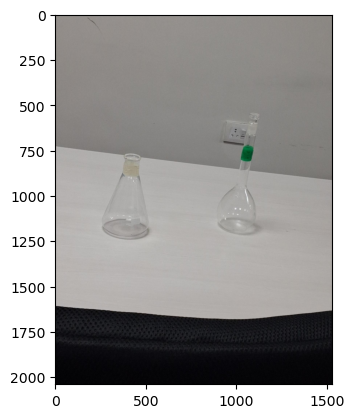

In [229]:
cv2_imshow(img)

In [230]:
result = model([img], conf=0.5)[0]
print(f'total {len(result)}')


0: 640x480 2 bands, 1 conical-flask, 1 volumetric-flask, 810.8ms
Speed: 2.3ms preprocess, 810.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


total 4


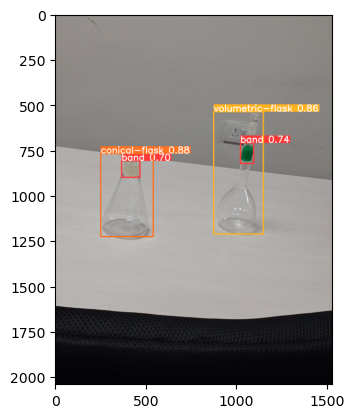

In [231]:
cv2_imshow(result.plot())

In [232]:
target_class=3

In [233]:
classes_present = [r.cls for r in result.boxes]
print(classes_present)

[tensor([2.]), tensor([3.]), tensor([0.]), tensor([0.])]


In [234]:
bands = [box for box in result if box.boxes.cls == 0]
print(len(bands))

2


In [235]:
targets = [box for box in result if box.boxes.cls == target_class]
print(len(targets))

1


In [236]:
target = targets[0]
print(target.boxes.data.numpy()[0])

[     873.58      538.86      1146.5      1213.3     0.86235           3]


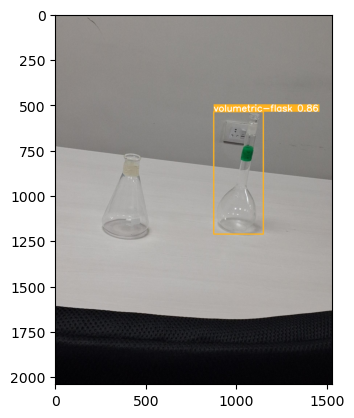

In [237]:
cv2_imshow(target.plot())

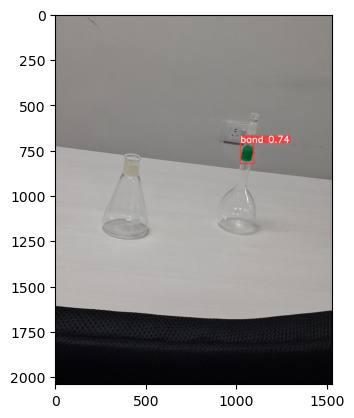

In [238]:
cv2_imshow(bands[0].plot())

In [239]:
def is_band_inside_target(target, band):
    """
    Checks if the center point of bounding box band is inside the bounds of bounding box target.

    Args:
        target (torch.Tensor): Tensor of shape (4,) representing [x_min, y_min, x_max, y_max] of box target.
        band (torch.Tensor): Tensor of shape (4,) representing [x_min, y_min, x_max, y_max] of box band.

    Returns:
        bool: True if the center of band is inside target, False otherwise.
    """
    # Compute the center of band
    print(f'{target=}')
    print(f'{band=}')
    center_x = (band[0] + band[2]) / 2
    center_y = (band[1] + band[3]) / 2
    print(target[0], target[2], center_x)
    # Check if the center of band is within the bounds of target
    is_inside = (target[0] <= center_x <= target[2]) and (target[1] <= center_y <= target[3])

    return is_inside

In [240]:
target_band = [band for band in bands if is_band_inside_target(target.boxes.data.numpy()[0], band.boxes.data.numpy()[0])][0]

target=array([     873.58,      538.86,      1146.5,      1213.3,     0.86235,           3], dtype=float32)
band=array([     1020.6,       710.9,      1093.8,      824.94,     0.74025,           0], dtype=float32)
873.5831 1146.4844 1057.1917724609375
target=array([     873.58,      538.86,      1146.5,      1213.3,     0.86235,           3], dtype=float32)
band=array([     366.28,      809.87,       467.5,      900.86,     0.69589,           0], dtype=float32)
873.5831 1146.4844 416.8933410644531


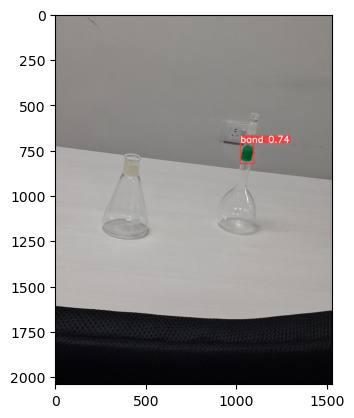

In [241]:
cv2_imshow(target_band.plot())

In [242]:
target_band.boxes.xyxy.numpy()[0]

array([     1020.6,       710.9,      1093.8,      824.94], dtype=float32)